<a href="https://colab.research.google.com/github/omnarawat/Bank-Churning-Model/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

#Bank Churning Model

#**Objective**

Data Encoding

Feature Scaling

Handling Imbalance Data

  a) Random Under Sampling

  b) Random Over Sampling  

#**Data Source**

YBI-Foundation/Dataset-GitHub

https://github.com/YBI-Foundation/Dataset



#**Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#**Import Data**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

#**Describe Data**

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#**Data Visualization**

<Axes: ylabel='Frequency'>

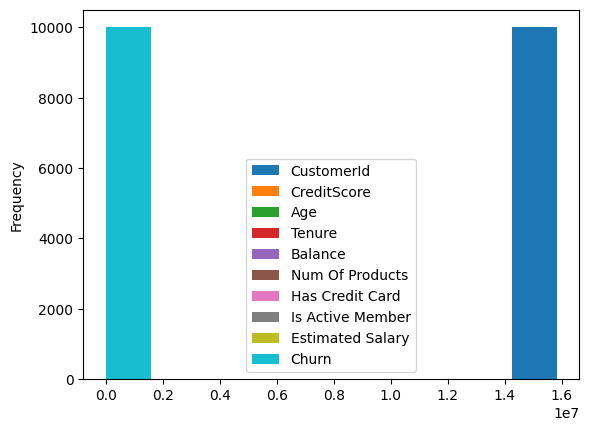

In [7]:
df.plot(kind = 'hist')

#**Data Preprocessing**

In [8]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [9]:
df1 = df.drop(['CustomerId', 'Surname'],axis=1)

In [10]:
df1 = df[['CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn']]

In [11]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df1 = pd.get_dummies(df1)

In [13]:
df1.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [14]:
df1.Churn.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

#**Define Target Variable (y) and Feature Variables (X)**

In [15]:
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products',
       'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Churn',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [16]:
y = df1['Churn']
X = df1[['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products',
       'Has Credit Card', 'Is Active Member', 'Estimated Salary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male']]

In [17]:
# imblearn Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X,y)

In [18]:
X.shape,X_rus.shape

((10000, 13), (4074, 13))

In [19]:
y.value_counts(),y_rus.value_counts()

(Churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 Churn
 0    2037
 1    2037
 Name: count, dtype: int64)

In [20]:
# imblearn Over Sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

In [21]:
X.shape,X_ros.shape

((10000, 13), (15926, 13))

In [22]:
y.value_counts(),y_ros.value_counts()

(Churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 Churn
 1    7963
 0    7963
 Name: count, dtype: int64)

#**Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2429)

#**Modeling**

In [24]:
#create model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred=rfc.predict(X_test)

#**Model Evaluation**

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2002
           1       0.74      0.42      0.54       498

    accuracy                           0.86      2500
   macro avg       0.81      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500



In [28]:
# Train Test Split of  Oversample Data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_ros,y_ros, random_state=2529)

In [29]:
# create model Oversample Data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [30]:
# Train model Oversample Data
rfc.fit(X_train,y_train)

RandomForestClassifier()

#**Prediction**

In [31]:
# predict model Oversample Data
y_pred = rfc.predict(X_test)

In [32]:
# evaluation Oversample Data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1979
           1       0.92      0.98      0.95      2003

    accuracy                           0.95      3982
   macro avg       0.95      0.95      0.95      3982
weighted avg       0.95      0.95      0.95      3982



#**Explanation**

In any Machine Learning classification algorithm for churn analysis, there are several key elements that must be taken. These include the raw data inputs, the appropriate statistical techniques, the model selection criteria, and the evaluation techniques.

Raw data inputs are the data points that the algorithm will use to make its predictions. This could include customer transaction history, customer satisfaction surveys, and past interactions with the bank.

The appropriate statistical techniques must be used in order to accurately process the data and make an accurate prediction. This could include regression analysis, classification analysis, clustering analysis, or a combination of these techniques.

The model selection criteria is used to determine which algorithm is best suited for the task. This will depend on the data available, the accuracy of the model, the speed of the model, and the number of resources available.

Finally, the evaluation techniques are used to determine how accurate the model is. These could include precision, recall, and accuracy metrics.

Hence, The recall is 0.98,

The precision is 0.92 and at last,

The overall accuracy of the model is 0.95 .
